In [3]:
import numpy as np
import pandas as pd
import math
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn import ensemble  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 

In [4]:
iowa_file_path = './complete_timeseries_dataset.csv'

df = pd.read_csv(iowa_file_path,index_col = 0)
iowa_file_path = './players_raw.csv'

players_raw = pd.read_csv(iowa_file_path,index_col = 0)

In [5]:
Teams = {
"Arsenal" : "1",
"Aston Villa" : "2",
"Brighton" : "3",
"Burnley" : "4",
"Chelsea" : "5",
"Crystal Palace" : "6",
"Everton" : "7",
"Fulham" : "8",
"Leicester" : "9",
"Leeds" : "10",
"Liverpool" : "11",
"Man City" : "12",
"Man Utd" : "13",
"Newcastle" : "14",
"Sheffield Utd" : "15",
"Southampton" : "16",
"Spurs" : "17",
"West Brom" : "18",
"West Ham" : "19",
"Wolves" : "20",
}
  
df["team"] = df["team"].map(Teams)
df.iloc[1].was_home

False

In [6]:
players_raw = players_raw.astype({'id':'string'})
mydict = dict(zip(players_raw.web_name, players_raw.id))
c=0
mydict['Aguero']=2000
mydict['De Breuyne']=2001
mydict['H. Barnes']=2002
mydict['Martinez']=2003
mydict['Richarlisson']=2004
mydict['TAA']=2005
mydict['LLoris']=2006

for index,row in df.iterrows():
  id = mydict[row["name"]]
  df._set_value(index,'name',id)
  
df["was_home"] = df["was_home"].astype(int)
df["1_was_home"] = df["1_was_home"].astype(int)
df["2_was_home"] = df["2_was_home"].astype(int)
df["3_was_home"] = df["3_was_home"].astype(int)
df["4_was_home"] = df["4_was_home"].astype(int)
df.iloc[1]
  

name               2000
team                 12
position              3
gameweek              6
total_points          0
                 ...   
4_opp_xpts       1.4646
4_opp_wins            0
4_opp_draws           0
4_opp_loses           1
4_opp_npxGD    -0.71673
Name: 1, Length: 222, dtype: object

In [7]:
train = df

X = pd.concat([train.iloc[:,[2]], train.iloc[:,5:]], axis = 1)
y = train.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



In [8]:


regr = RandomForestRegressor(oob_score = True, n_estimators = 10000, max_features = 5)

regr.fit(X_train, y_train)
predict_train = regr.predict(X_train)

predict_test = regr.predict(X_test)



In [9]:


out_of_bag_predict = regr.oob_score

residuals = predict_train - y_train
residuals2 = predict_test - y_test
residuals3 = out_of_bag_predict - y_train
mse_train = np.sqrt(sum(residuals**2)/len(residuals))
mse_test = np.sqrt(sum(residuals2**2)/len(residuals2))
mse_out_of_bag = np.sqrt(sum(residuals3**2)/len(residuals3))
abs_train = sum(abs(residuals))/len(residuals)
abs_test = sum(abs(residuals2))/len(residuals2)
abs_out_of_bag = sum(abs(residuals3))/len(residuals3)

In [10]:
print('sqrt(MSE) on train set: ', mse_train)
print('sqrt(MSE) on test set: ', mse_test)
print('Mean Absolute value of residuals on train set: ', abs_train)
print('Mean Absolute value of residuals on test set: ', abs_test)

sqrt(MSE) on train set:  1.3419217635208536
sqrt(MSE) on test set:  3.4214488974884594
Mean Absolute value of residuals on train set:  1.0339512931034454
Mean Absolute value of residuals on test set:  2.6829946120689683


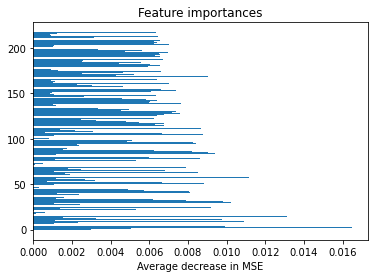

In [12]:
importances = regr.feature_importances_
plt.figure()
plt.title("Feature importances")
ax = plt.barh(range(len(X_train.columns)),importances,align="center");
plt.xlabel('Average decrease in MSE');

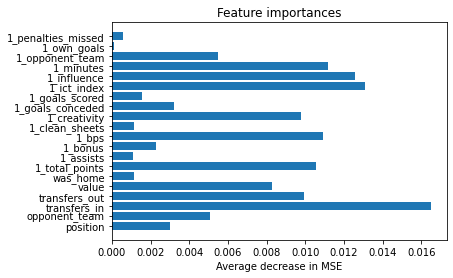

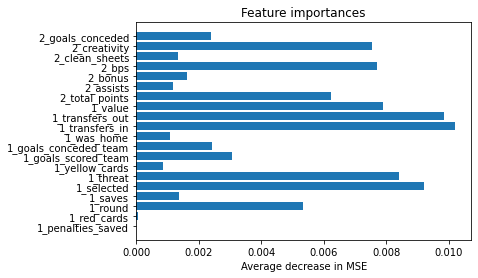

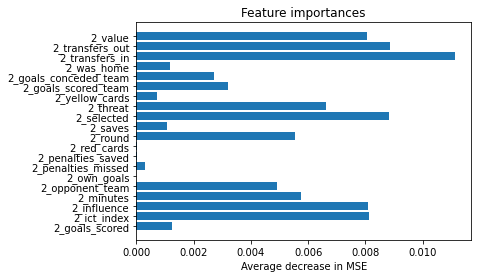

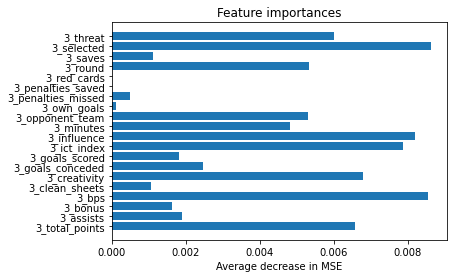

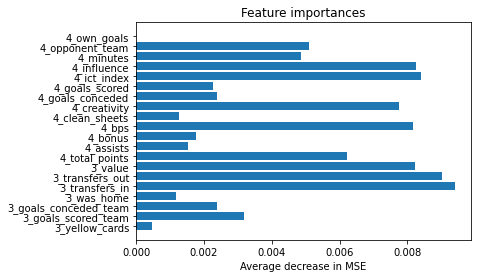

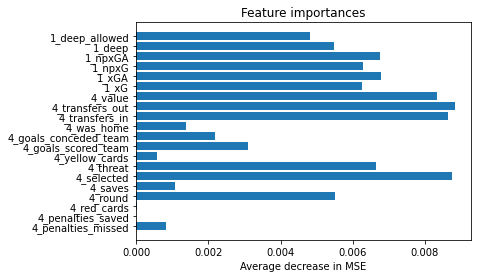

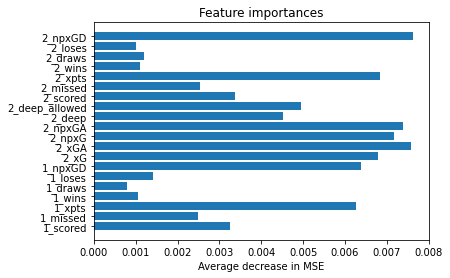

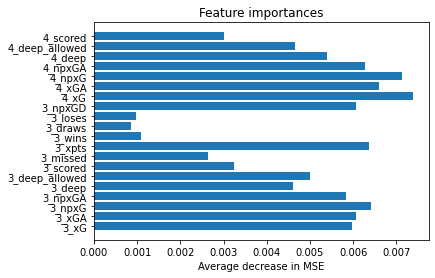

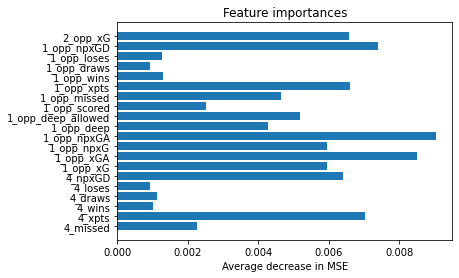

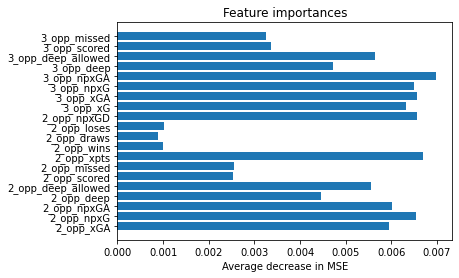

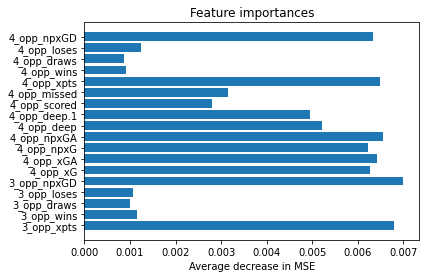

In [13]:


for i in range(0,220,20):
    plt.figure()
    plt.title("Feature importances")
    ax = plt.barh(list(X_train.columns)[i:i+20],importances[i:i+20],align="center");
    plt.xlabel('Average decrease in MSE');



In [14]:
features = [1,5,10,25,50,100]
n = len(features)
mse_train = [math.nan for i in range(n)]
mse_test = [math.nan for i in range(n)]
mse_out_of_bag = [math.nan for i in range(n)]
abs_train = [math.nan for i in range(n)]
abs_test = [math.nan for i in range(n)]
abs_out_of_bag = [math.nan for i in range(n)]

for i in range(n):
    Forest = RandomForestRegressor(oob_score = True, n_estimators = 1000, max_features = features[i])
    Forest.fit(X_train, y_train)
    
    predict_train = Forest.predict(X_train)

    predict_test = Forest.predict(X_test)



    
    
    
    residuals = predict_train - y_train
    residuals2 = predict_test - y_test
    residuals3 = out_of_bag_predict - y_train
    mse_train[i] = np.sqrt(sum(residuals**2)/len(residuals))
    mse_test[i] = np.sqrt(sum(residuals2**2)/len(residuals2))
    mse_out_of_bag[i] = np.sqrt(sum(residuals3**2)/len(residuals3))
    abs_train[i] = sum(abs(residuals))/len(residuals)
    abs_test[i] = sum(abs(residuals2))/len(residuals2)
    abs_out_of_bag[i] = sum(abs(residuals3))/len(residuals3)

Text(0.5, 1.0, 'number of features = [1,5,10,25,50,100]')

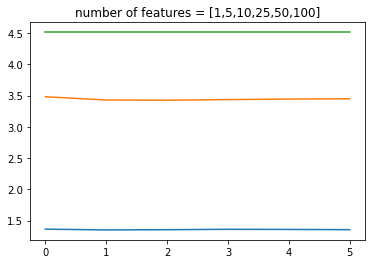

In [15]:


plt.figure()
plt.plot(np.arange(6), mse_train)
plt.plot(np.arange(6), mse_test)
plt.plot(np.arange(6), mse_out_of_bag)
plt.title('number of features = [1,5,10,25,50,100]')

